# Instacart Dataset
The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now let's load the data in pandas dataframe
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
aisles = pd.read_csv('aisles.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')

Let's explore order_products_train and order_products_prior dataframes. These dataframes specify which products were purchased in each order. More specifically, order_products__prior contains previous order contents for all customers and order_products_train contains the last orders for some customers only.

In [3]:
print("The order_products_train size is : ", order_products_train.shape)
print("The order_products_prior size is : ", order_products_prior.shape)

The order_products_train size is :  (1384617, 4)
The order_products_prior size is :  (32434489, 4)


Let's combine both the dataframe to a single dataframe as order_products

In [4]:
order_products = pd.concat([order_products_train, order_products_prior], axis=0)
print("The order_products size is : ", order_products.shape)

The order_products size is :  (33819106, 4)


Let's take a peek at the combined dataframe

In [5]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


# Missing Data
Checking all the dataframes for any missing data

In [6]:
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [7]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [8]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [9]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [10]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

From the above analysis we know that our dataset doesn't have any missing data, except the "orders" dataframe

In [11]:
orders_unique = len(set(order_products.order_id))
products_unique = len(set(order_products.product_id))
print("There are %s orders for %s products" %(orders_unique, products_unique))

There are 3346083 orders for 49685 products


# Distribution of Products Ordered

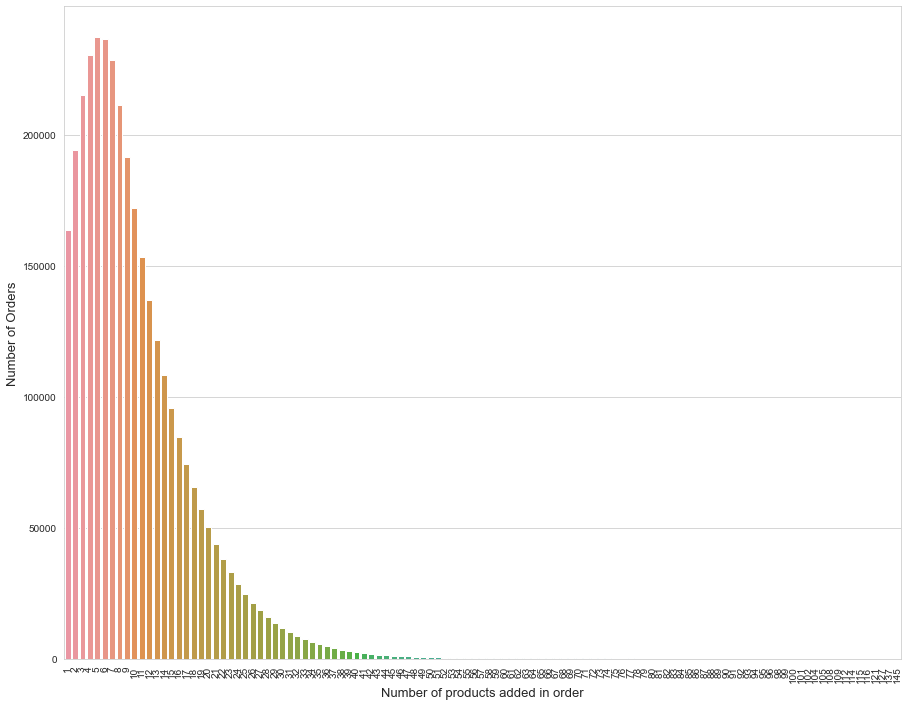

In [12]:
grouped = order_products.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

In [24]:
grouped = order_products.groupby("product_id")["reordered"].aggregate('count').reset_index()
#grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
#grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

,product_id,reordered
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16
...,...,...
49680,49684,9
49681,49685,49
49682,49686,127
49683,49687,14


In [14]:
orders.shape

(3421083, 7)

# Let's look at when customers make orders

### 1. Orders by hour of day

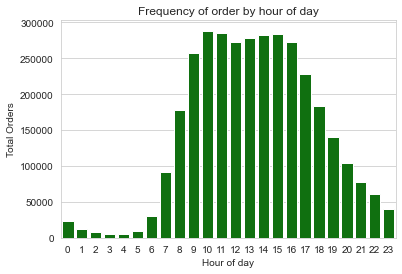

In [19]:
#Order by the hour of the day
sns.countplot(x="order_hour_of_day", data=orders, color='green')
plt.ylabel('Total Orders')
plt.xlabel('Hour of day')
plt.title("Frequency of order by hour of day", fontsize=12)
plt.show()

### 2. Order by day of week

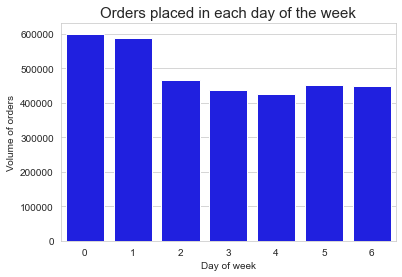

In [20]:
#Order by day of week
sns.countplot(x="order_dow", data=orders, color='blue')
plt.ylabel('Volume of orders')
plt.xlabel('Day of week')
plt.title("Orders placed in each day of the week", fontsize=15)
plt.show()

### 3.Period of Reorders

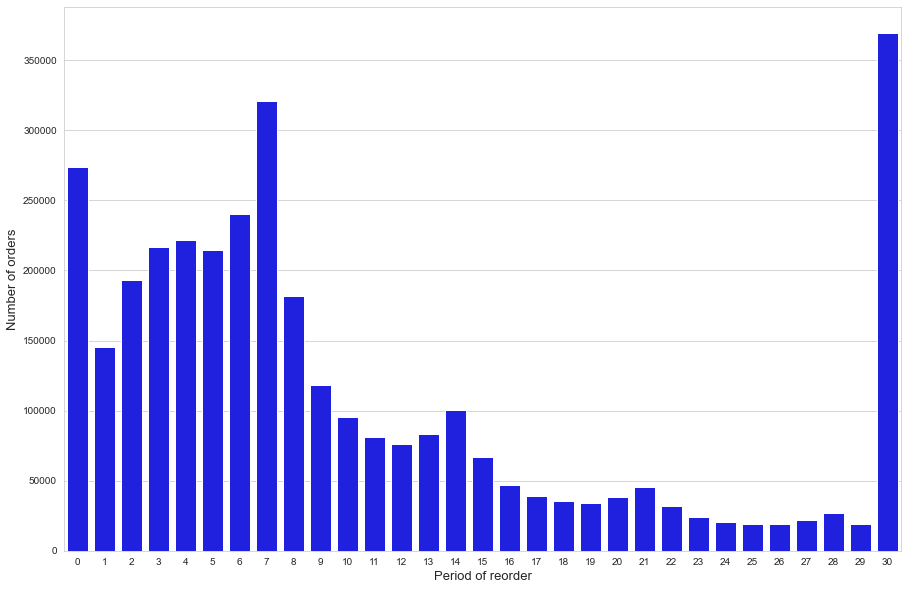

In [22]:
grouped = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = grouped.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values, color = 'blue')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

## Distribution of day of week vs the hour of the day

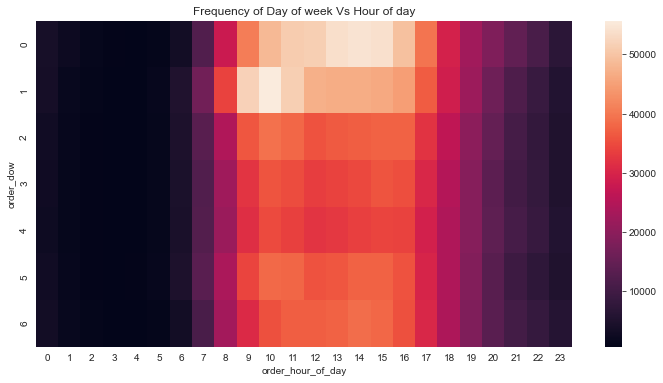

In [50]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## Orders made by each customer

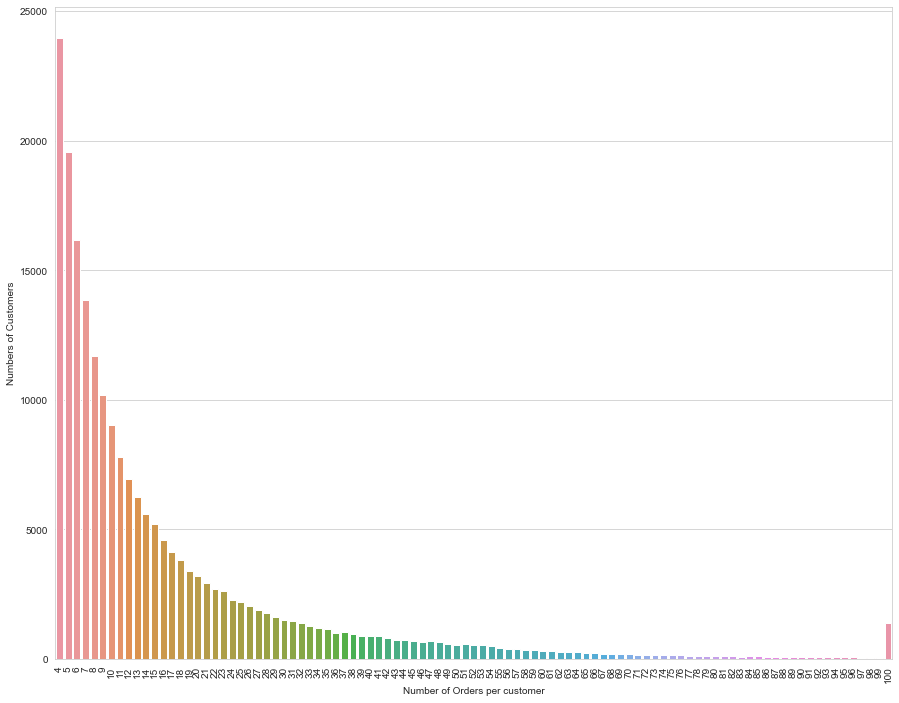

In [23]:
grouped = orders.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()
grouped = grouped.groupby('order_id').aggregate("count")

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(grouped.index, grouped.user_id)
plt.ylabel('Numbers of Customers')
plt.xlabel('Number of Orders per customer')
plt.xticks(rotation='vertical')
plt.show()

## Best selling products

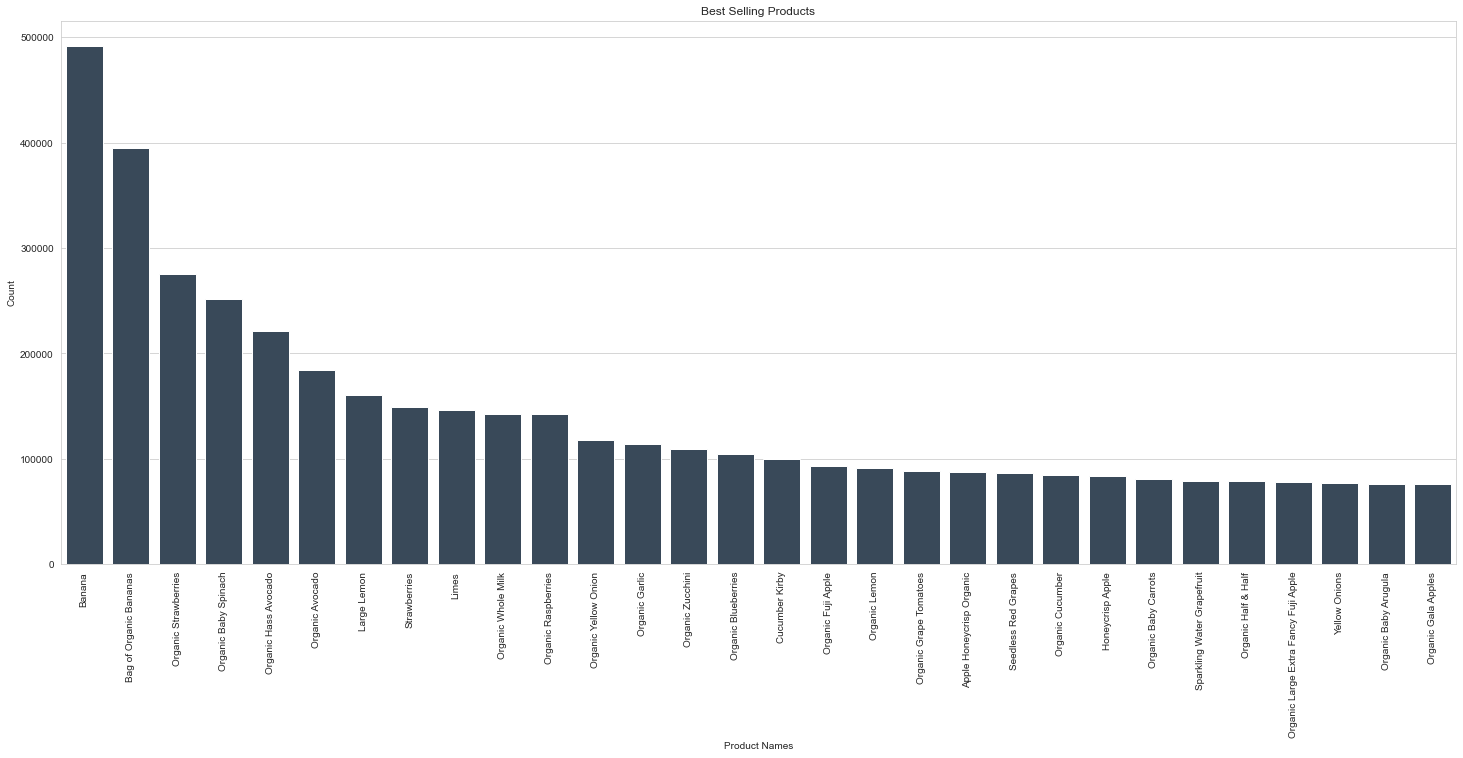

,product_id,count,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


In [36]:
productsCount = order_products["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v",color="#34495e")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)
plt.show()

mergedData.head(10)

## First item added to the cart by the customers

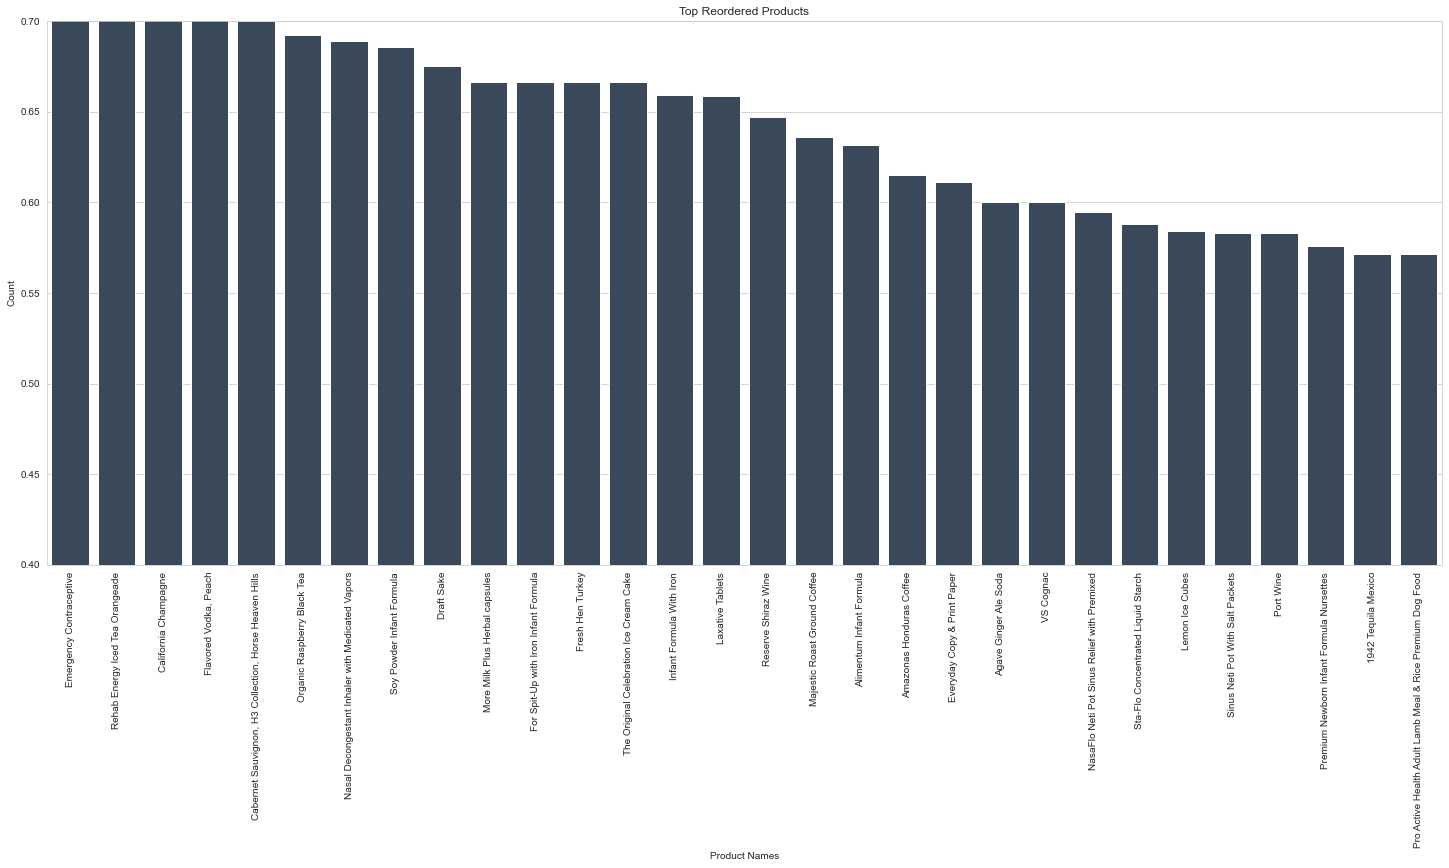

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
0,43144,1,1.0,1.0,"Flax Oil, Organic, Omega-3, Original Formula",19,13
1,44495,1,1.0,1.0,Lowfat Cherry Lime Supernova Kefir Cultured Mi...,120,16
2,27863,7,7.0,1.0,Cooking Fuel,10,17
3,12841,3,3.0,1.0,King Crab Legs,39,12
4,34962,2,2.0,1.0,Prenatal Nutrients,47,11
5,36597,3,3.0,1.0,Vanilla Flavor Multi-Symptom Relief,70,11
6,41790,3,3.0,1.0,Peppermint Schnapps Liqueur,124,5
7,11254,1,1.0,1.0,Drink Distinct All Natural Soda Pineapple Coco...,100,21
8,34463,1,1.0,1.0,Vegan Coconut Milk Caramels With Sea Salt,45,19
9,2796,2,2.0,1.0,American Blend,130,14


In [38]:
productsCountFirst = order_products[order_products["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
productsCountFirst["reordered_count"] = productsCountFirst.product_id
productsCountFirst["product_id"] = productsCountFirst.index
productCountFirstMerged = pd.merge(productsCount,productsCountFirst,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountFirstMerged["first_ordered_ratio"] = productCountFirstMerged["reordered_count"]/productCountFirstMerged["count"]
productCountFirstMerged.sort_values(by="first_ordered_ratio",ascending=False,inplace=True)
firstMerged = pd.merge(productCountFirstMerged,products,how="left",on="product_id")


fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=firstMerged[firstMerged["count"]>10].head(30),x="product_name",y="first_ordered_ratio",color="#34495e",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)
plt.show()

firstMerged.head(10)

## Now let's combine products, departments and aisles into a single dataframe

In [44]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


## Most Important Departments by number of products

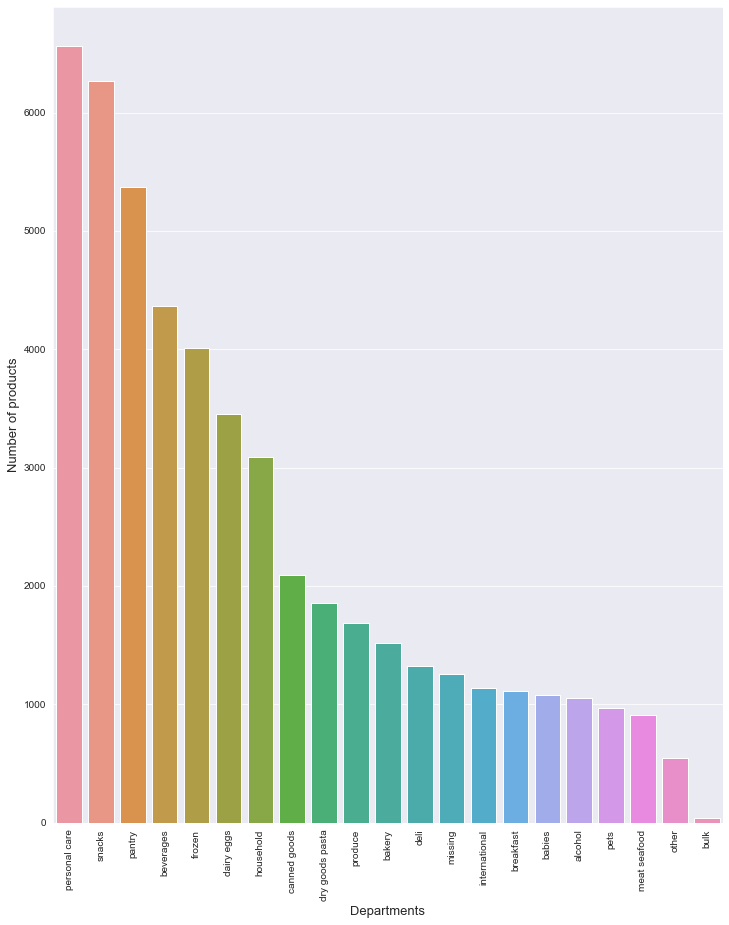

In [45]:
grouped = items.groupby(["department"], as_index = False).agg({'product_id':{'count'}})
grouped.columns = ['department', 'Total_products']
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped

grouped  = grouped.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

## Most important Aisles over all Departments by number of Products

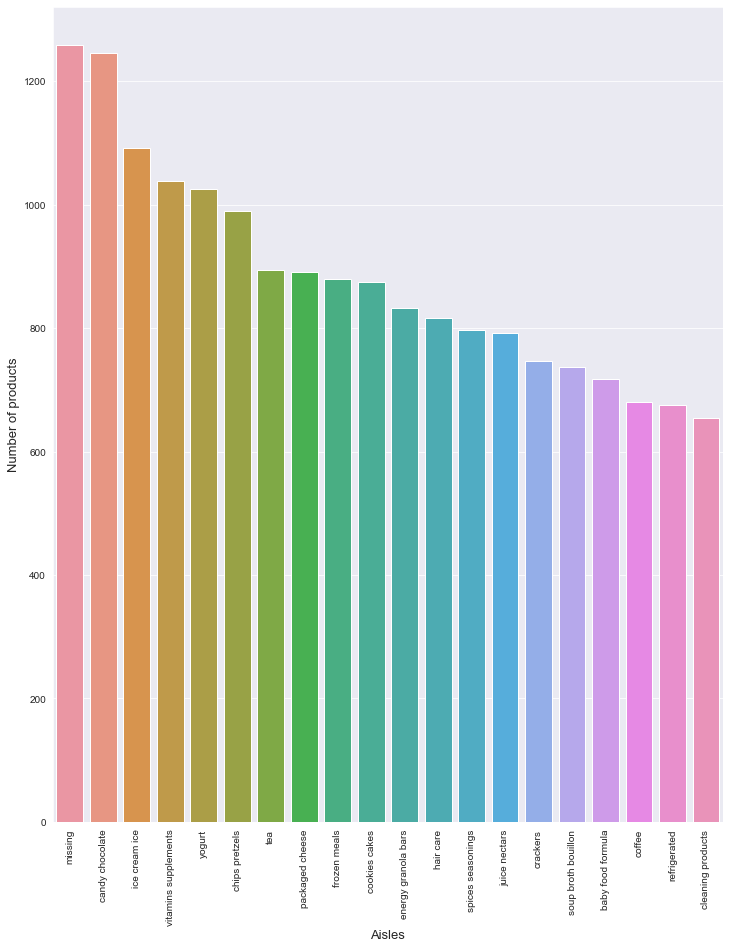

In [49]:
grouped = items.groupby(["aisle"], as_index = False).agg({'product_id':{'count'}})
grouped.columns = ['aisle', 'Total_products']
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped = grouped.sort_values(by='Total_products', ascending=False)[:20]
grouped

grouped  = grouped.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()